In [23]:
import pandas as pd
import math
import itertools

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


def createDataFrame(filename, delimiter):
    return pd.read_csv(filename, sep=delimiter, error_bad_lines=False, encoding='utf8')

dataset = createDataFrame('movie_metadata.csv', ',')


In [24]:
#movieLens latest-small voor devel
movieLensMerge = createDataFrame('ml-latest-small/links.csv', ',')

dataselect = dataset['movie_imdb_link'].str.extract('(?P<imdbId>\d{7})', expand=True).astype(int)
dataselect = pd.concat([dataset, dataselect], axis=1)
movieLensData = pd.merge(dataselect, movieLensMerge, left_on = 'imdbId', right_on = 'imdbId')
movieLensRatings = createDataFrame('ml-latest-small/ratings.csv', ',')
movieLensData = pd.merge(movieLensRatings, movieLensData, left_on = 'movieId', right_on = 'movieId')
movieLensData

,userId,movieId,rating,timestamp,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,imdbId,tmdbId
0,1,1061,3.0,1260759182,Black and White,Barry Levinson,73.0,147.0,272.0,893.0,...,USA,R,44000000.0,1996.0,11000.0,7.5,2.35,0,117665,819.0
1,19,1061,3.0,855190382,Black and White,Barry Levinson,73.0,147.0,272.0,893.0,...,USA,R,44000000.0,1996.0,11000.0,7.5,2.35,0,117665,819.0
2,23,1061,3.5,1148673456,Black and White,Barry Levinson,73.0,147.0,272.0,893.0,...,USA,R,44000000.0,1996.0,11000.0,7.5,2.35,0,117665,819.0
3,30,1061,3.0,946162006,Black and White,Barry Levinson,73.0,147.0,272.0,893.0,...,USA,R,44000000.0,1996.0,11000.0,7.5,2.35,0,117665,819.0
4,70,1061,5.0,853955020,Black and White,Barry Levinson,73.0,147.0,272.0,893.0,...,USA,R,44000000.0,1996.0,11000.0,7.5,2.35,0,117665,819.0
5,73,1061,4.0,1255947496,Black and White,Barry Levinson,73.0,147.0,272.0,893.0,...,USA,R,44000000.0,1996.0,11000.0,7.5,2.35,0,117665,819.0
6,90,1061,4.0,875517306,Black and White,Barry Levinson,73.0,147.0,272.0,893.0,...,USA,R,44000000.0,1996.0,11000.0,7.5,2.35,0,117665,819.0
7,102,1061,2.0,957894450,Black and White,Barry Levinson,73.0,147.0,272.0,893.0,...,USA,R,44000000.0,1996.0,11000.0,7.5,2.35,0,117665,819.0
8,105,1061,4.0,1085579876,Black and White,Barry Levinson,73.0,147.0,272.0,893.0,...,USA,R,44000000.0,1996.0,11000.0,7.5,2.35,0,117665,819.0
9,119,1061,4.0,952583272,Black and White,Barry Levinson,73.0,147.0,272.0,893.0,...,USA,R,44000000.0,1996.0,11000.0,7.5,2.35,0,117665,819.0


In [25]:
# movieLensMerge = createDataSet('ml-latest/links.csv', ',')
# # haal het id op uit de link
# dataselect = dataset['movie_imdb_link'].str.extract('(?P<imdbId>\d{7})', expand=True).astype(int)
# #voeg id's toe aan dataset als nieuwe kolom
# dataselect = pd.concat([dataset, dataselect], axis=1)
# #join movielens db met imdbId
# movieLensData = pd.merge(dataselect, movieLensMerge, left_on = 'imdbId', right_on = 'imdbId')

In [26]:
# #haal ratings data op en join met dataset
# #dit kan wel even duren # gebruik latest-small voor developement
# movieLensRatings = createDataSet('ml-latest/ratings.csv', ',')
# movieLensData = pd.merge(movieLensRatings, movieLensData, left_on = 'movieId', right_on = 'movieId')

In [27]:
def toPercent(array):
    returnArray = []
    maxScore = max(array)
    for i in range(len(array)):
        array[i] = checkNumber(array[i])        
        if array[i] is not None:
            returnArray.append(array[i] / maxScore*100)
        else:
            returnArray.append(None)
    return returnArray

def checkNumber(var1):
    if (math.isnan(var1)) | (var1 == 0):
        return None
    return var1

In [28]:
dataset

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000


In [29]:
#deze duurt ook wel even
movieLensData

,userId,movieId,rating,timestamp,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,imdbId,tmdbId
0,1,1061,3.0,1260759182,Black and White,Barry Levinson,73.0,147.0,272.0,893.0,...,USA,R,44000000.0,1996.0,11000.0,7.5,2.35,0,117665,819.0
1,19,1061,3.0,855190382,Black and White,Barry Levinson,73.0,147.0,272.0,893.0,...,USA,R,44000000.0,1996.0,11000.0,7.5,2.35,0,117665,819.0
2,23,1061,3.5,1148673456,Black and White,Barry Levinson,73.0,147.0,272.0,893.0,...,USA,R,44000000.0,1996.0,11000.0,7.5,2.35,0,117665,819.0
3,30,1061,3.0,946162006,Black and White,Barry Levinson,73.0,147.0,272.0,893.0,...,USA,R,44000000.0,1996.0,11000.0,7.5,2.35,0,117665,819.0
4,70,1061,5.0,853955020,Black and White,Barry Levinson,73.0,147.0,272.0,893.0,...,USA,R,44000000.0,1996.0,11000.0,7.5,2.35,0,117665,819.0
5,73,1061,4.0,1255947496,Black and White,Barry Levinson,73.0,147.0,272.0,893.0,...,USA,R,44000000.0,1996.0,11000.0,7.5,2.35,0,117665,819.0
6,90,1061,4.0,875517306,Black and White,Barry Levinson,73.0,147.0,272.0,893.0,...,USA,R,44000000.0,1996.0,11000.0,7.5,2.35,0,117665,819.0
7,102,1061,2.0,957894450,Black and White,Barry Levinson,73.0,147.0,272.0,893.0,...,USA,R,44000000.0,1996.0,11000.0,7.5,2.35,0,117665,819.0
8,105,1061,4.0,1085579876,Black and White,Barry Levinson,73.0,147.0,272.0,893.0,...,USA,R,44000000.0,1996.0,11000.0,7.5,2.35,0,117665,819.0
9,119,1061,4.0,952583272,Black and White,Barry Levinson,73.0,147.0,272.0,893.0,...,USA,R,44000000.0,1996.0,11000.0,7.5,2.35,0,117665,819.0


<h1>Worst Movies</h1>

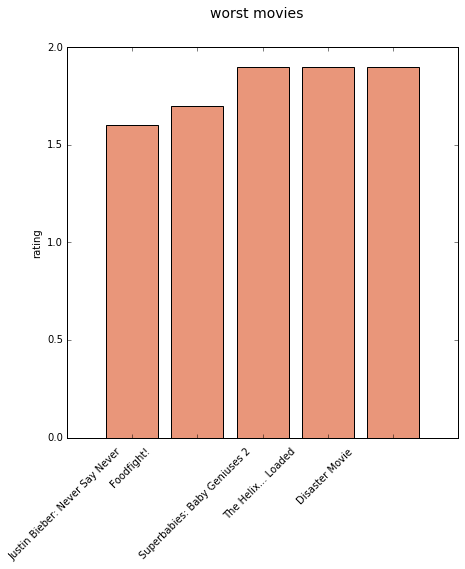

In [47]:
x_axis = [i+1 for i in range(5)]
y_axis = []
worstmovies = ['']

worstmovies = dataset.sort_values(by='imdb_score', ascending=True).head(5);

for i in range(5):
    try:
        var1 = worstmovies.iloc[i]['imdb_score']
        y_axis.append(var1)
    except:
        y_axis.append(0)

fig = plt.figure(figsize=(7, 7))
fig.suptitle('worst movies', fontsize=14)
ax = fig.add_subplot(111)
ax.set_xlabel('')
ax.set_ylabel('rating')
ax.bar(x_axis, y_axis, fc='darksalmon', align='center')

ax.set_xticklabels((worstmovies['movie_title']), rotation=45)
plt.show()

# Best Movies

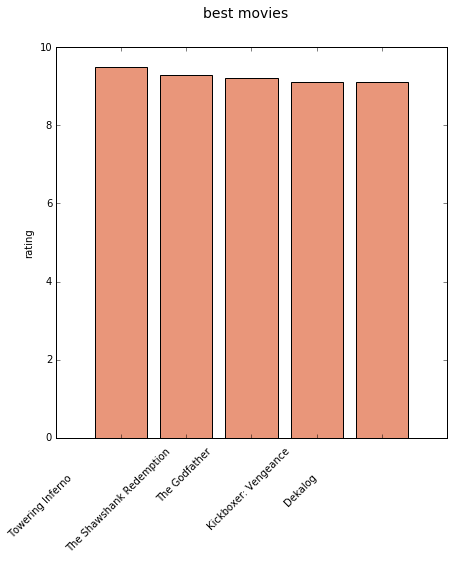

In [31]:
x_axis = [i+1 for i in range(5)]
y_axis = []
bestmovies = ['']

bestmovies = dataset.sort_values(by='imdb_score', ascending=False).head(5);

for i in range(5):
    try:
        var1 = bestmovies.iloc[i]['imdb_score']
        y_axis.append(var1)
    except:
        y_axis.append(0)

fig = plt.figure(figsize=(7, 7))
fig.suptitle('best movies', fontsize=14)
ax = fig.add_subplot(111)
ax.set_xlabel('')
ax.set_ylabel('rating')
ax.bar(x_axis, y_axis, fc='darksalmon', align='center')

ax.set_xticklabels((bestmovies['movie_title']), rotation=45)
plt.show()

# Most Liked Movie

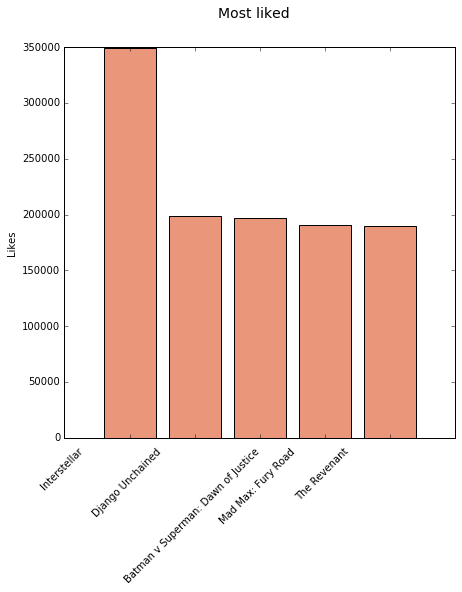

In [32]:
x_axis = [i+1 for i in range(5)]
y_axis = []
moviesFacebookLikes = ['']

moviesFacebookLikes = dataset.sort_values(by='movie_facebook_likes', ascending=False).head(5);

for i in range(5):
    try:
        var1 = moviesFacebookLikes.iloc[i]['movie_facebook_likes']
        y_axis.append(var1)
    except:
        y_axis.append(0)

fig = plt.figure(figsize=(7, 7))
fig.suptitle('Most liked', fontsize=14)
ax = fig.add_subplot(111)
ax.set_xlabel('')
ax.set_ylabel('Likes')
ax.bar(x_axis, y_axis, fc='darksalmon', align='center')

ax.set_xticklabels((moviesFacebookLikes['movie_title']), rotation=45)
plt.show()

# Languages

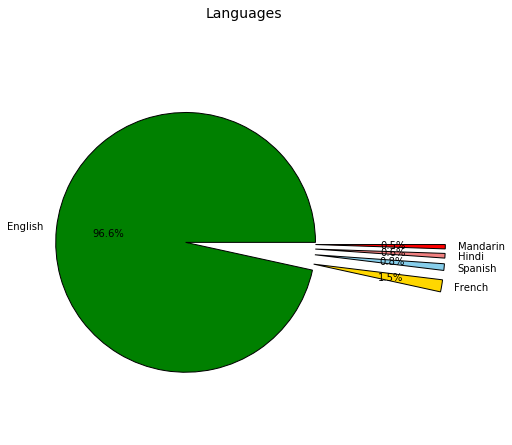

In [33]:
langCount = dataset.groupby('language').size().reset_index(name='count').sort_values(by='count',ascending=False).head(5)
#print langCount
labels = []
sizes = []

for i in langCount['language']:
    labels.append(i)

for i in langCount['count']:
    sizes.append(i)

colors = ['green', 'gold', 'skyblue', 'lightcoral', 'red']
explode = (0, 1, 1, 1, 1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig = plt.figure(figsize=(7, 7))
fig.suptitle('Languages', fontsize=14)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=False, startangle=0)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')

plt.show()

# Most liked Directors

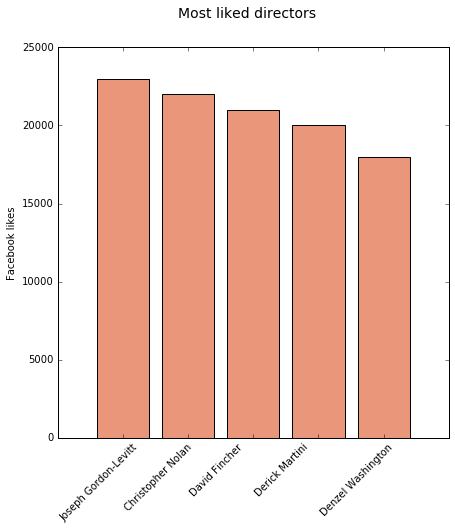

In [34]:
x_axis = [i+1 for i in range(5)]
y_axis = []
correlatieDirector = dataset[['director_facebook_likes', 'director_name']].drop_duplicates();
correlatieDirector = coralatieDirector.sort_values(by='director_facebook_likes', ascending=False).head(5);

for i in range(5):
    try:
        var1 = coralatieDirector.iloc[i]['director_facebook_likes']
        y_axis.append(var1)
    except:
        y_axis.append(0)

fig = plt.figure(figsize=(7, 7))
fig.suptitle('Most liked directors', fontsize=14)
ax = fig.add_subplot(111)
ax.set_xlabel('')
ax.set_ylabel('Facebook likes')
ax.bar(x_axis, y_axis, fc='darksalmon', align='center')

ax.set_xticklabels((coralatieDirector['director_name']), rotation=45, ha='left')
plt.show()

# Most liked Actors

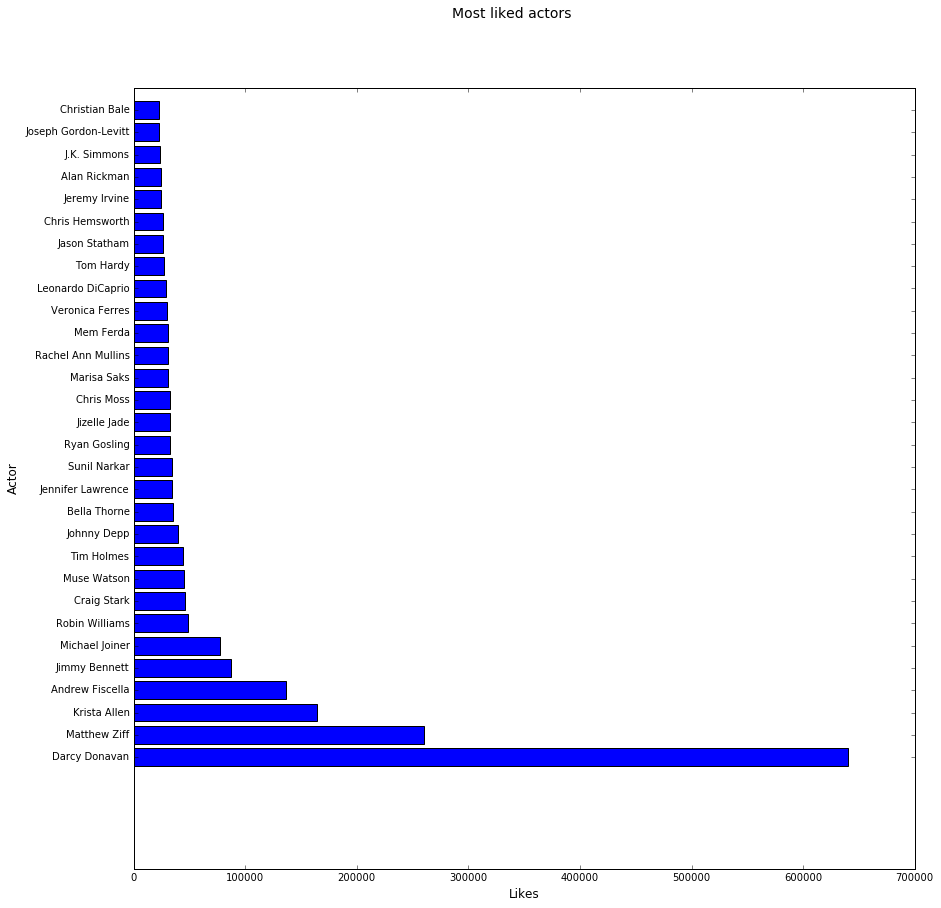

In [35]:
actors = []
actors1 = dataset['actor_1_name']
actors2 = dataset['actor_2_name']
actors3 = dataset['actor_3_name']
actorsIt = itertools.chain(actors1,actors2,actors3)
for i in actorsIt:
    actors.append(i)
#print actors

likes = []
likes1 = dataset['actor_1_facebook_likes']
likes2 = dataset['actor_2_facebook_likes']
likes3 = dataset['actor_3_facebook_likes']
likesIt = itertools.chain(likes1,likes2,likes3)
for i in likesIt:
    likes.append(i)

actorLikes = []
actorLikes = zip(actors,likes)

actorLikes_df = pd.DataFrame(actorLikes, columns=['actors', 'facebook_likes']).drop_duplicates()
# print df.sort_values(by='facebook_likes', ascending=False)

actorFacebookLikes = []
actorFacebookLikes = actorLikes_df.sort_values(by='facebook_likes', ascending=False).head(30)

x_axis = []
y_axis = np.arange(len(actorFacebookLikes))

for i in range(len(actorFacebookLikes)):
    try:
        var1 = actorFacebookLikes.iloc[i]['facebook_likes']
        x_axis.append(var1)
    except:
        x_axis.append(0)
        
fig = plt.figure(figsize=(14,14))
fig.suptitle('Most liked actors', fontsize=14)
ax = fig.add_subplot(111)
ax.set_xlabel('Likes', fontsize=12)
ax.set_ylabel('Actor', fontsize=12)
ax.barh(y_axis, x_axis, align='center')
ax.set_yticks(y_axis)
ax.set_yticklabels(actorFacebookLikes['actors'], rotation=0)
 
plt.show()

# Correlatie IMDB-score - Director likes

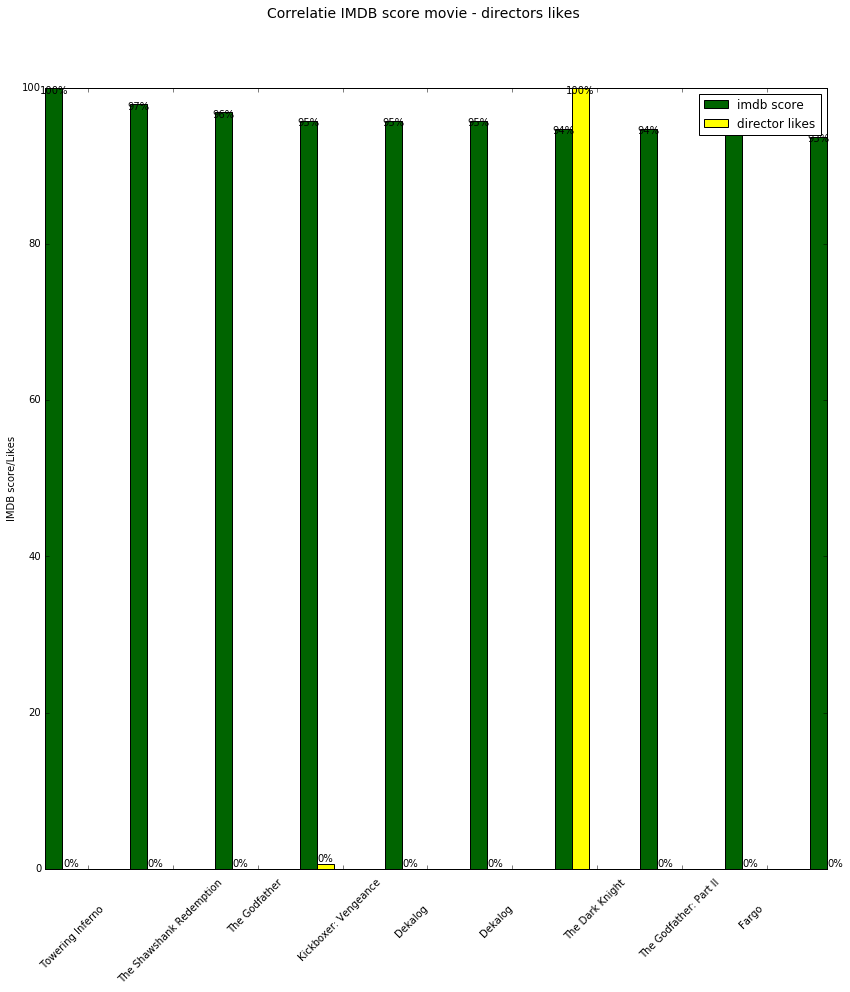

In [36]:
ds = []
ds = dataset.sort_values(by='imdb_score', ascending=False).head(10)
# print ds['director_facebook_likes']
ind = np.arange(len(ds))
width = 0.2

imdbScore = ds['imdb_score'].values
directorLikes = ds['director_facebook_likes'].values

imdbScore = toPercent(imdbScore)
directorLikes = toPercent(directorLikes)

fig = plt.figure(figsize=(14,14))
fig.suptitle('Correlatie IMDB score movie - directors likes', fontsize=14)
ax = fig.add_subplot(111)
rects1 = ax.bar(ind - width, imdbScore, width, color='darkgreen', align='center')
rects2 = ax.bar(ind, directorLikes, width, color='yellow', align='center')


# add some text for labels, title and axes ticks
ax.set_ylabel('IMDB score/Likes')
ax.set_xticks(ind + width)
ax.set_xticklabels(ds['movie_title'], rotation=45)
ax.autoscale(tight=True)

ax.legend((rects1[0], rects2[0]), ('imdb score', 'director likes'))

for rect in rects1:
    height = rect.get_height()
    if math.isnan(height):
        height = 0
        
    ax.text(rect.get_x() + rect.get_width()/2., 0.99*height,
            '%d' % int(height) + "%", ha='center', va='bottom')
    
for rect in rects2:
    height = rect.get_height()
#     print height
    if math.isnan(height):
        height = 0
    
    ax.text(rect.get_x() + rect.get_width()/2., 0.99*height,
            '%d' % int(height) + "%", ha='center', va='bottom')
    



plt.show()

# Correlatie IMDB-score - Actor likes

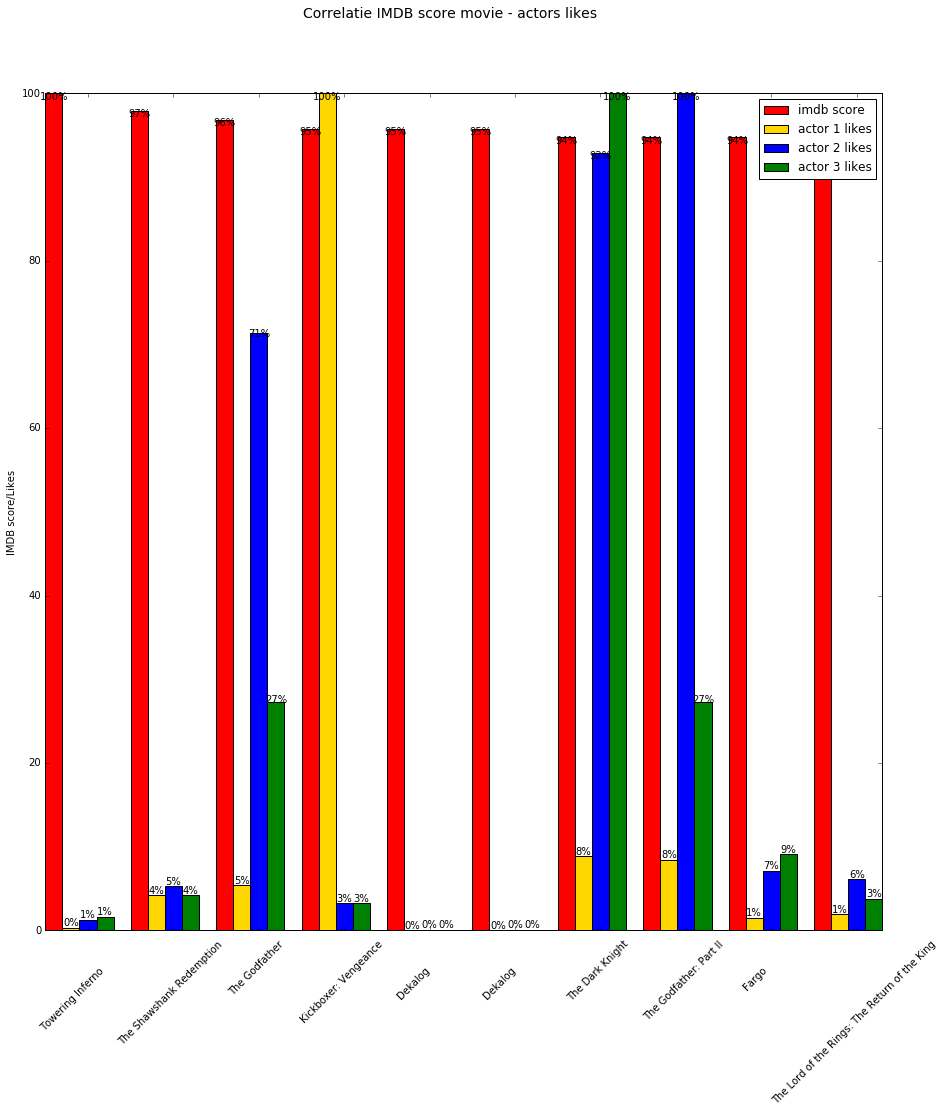

In [37]:
ds = []
ds = dataset.sort_values(by='imdb_score', ascending=False).head(10)
ind = np.arange(len(ds))
width = 0.2

imdbScore = ds['imdb_score'].values
actor1Likes = ds['actor_1_facebook_likes'].values
actor2Likes = ds['actor_2_facebook_likes'].values
actor3Likes = ds['actor_3_facebook_likes'].values

imdbScore = toPercent(imdbScore)
actor1Likes = toPercent(actor1Likes)
actor2Likes = toPercent(actor2Likes)
actor3Likes = toPercent(actor3Likes)

fig = plt.figure(figsize=(15,15))
fig.suptitle('Correlatie IMDB score movie - actors likes', fontsize=14)
ax = fig.add_subplot(111)
rects1 = ax.bar(ind - width, imdbScore, width, color='r', align='center')
rects2 = ax.bar(ind, actor1Likes, width, color='gold', align='center')
rects3 = ax.bar(ind + width, actor2Likes, width, color='b', align='center')
rects4 = ax.bar(ind + 2*width, actor3Likes, width, color='g', align='center')

# add some text for labels, title and axes ticks
ax.set_ylabel('IMDB score/Likes')
ax.set_xticks(ind + width)
ax.set_xticklabels(ds['movie_title'], rotation=45)
ax.autoscale(tight=True)

ax.legend((rects1[0], rects2[0], rects3[0], rects4[0]), ('imdb score', 'actor 1 likes', 'actor 2 likes', 'actor 3 likes'))

for rect in rects1:
    height = rect.get_height()
    if math.isnan(height):
        height = 0
    ax.text(rect.get_x() + rect.get_width()/2., 0.99*height,
            '%d' % int(height) + "%", ha='center', va='bottom')
    
for rect in rects2:
    height = rect.get_height()
    if math.isnan(height):
        height = 0
    ax.text(rect.get_x() + rect.get_width()/2., 0.99*height,
            '%d' % int(height) + "%", ha='center', va='bottom')
    
for rect in rects3:
    height = rect.get_height()
    if math.isnan(height):
        height = 0
    ax.text(rect.get_x() + rect.get_width()/2., 0.99*height,
            '%d' % int(height) + "%", ha='center', va='bottom')
    
for rect in rects4:
    height = rect.get_height()
    if math.isnan(height):
        height = 0
    ax.text(rect.get_x() + rect.get_width()/2., 0.99*height,
            '%d' % int(height) + "%", ha='center', va='bottom')


plt.show()

# Correlatie Aantal movies - IMDB-score

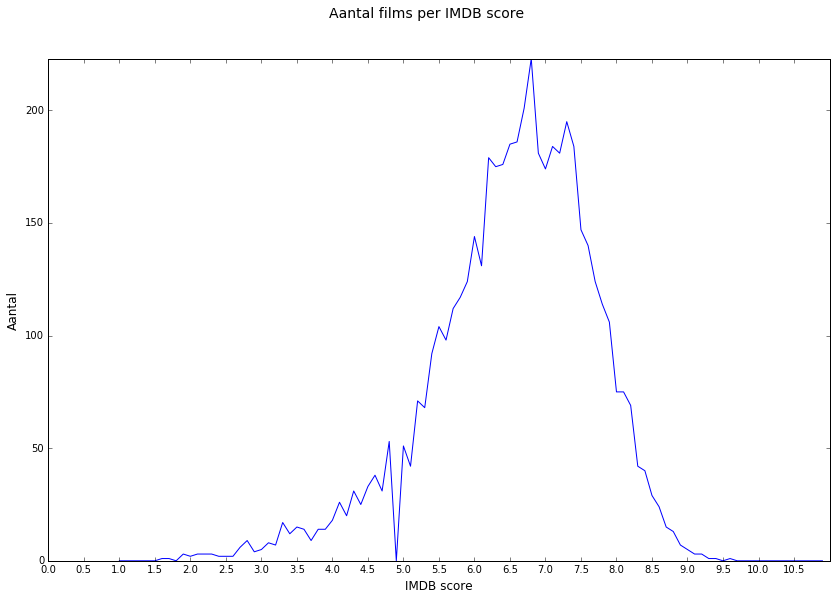

In [38]:
likes = []
x_axis = []
y_axis = []

interval = 1

for i in range (1, 101):
    # eerste index, want het zit in een array
    var1 = dataset.loc[(dataset['imdb_score'] > (interval - 0.1)) & 
        (dataset['imdb_score'] <= interval)][['movie_title']].count().values[0]
        
    y_axis.append(var1)
    x_axis.append(interval)
    
    interval += 0.1

m = (max(y_axis))

fig = plt.figure(figsize=(14,9))
fig.suptitle('Aantal films per IMDB score', fontsize = 14)

ax = fig.add_subplot(111)
ax.set_xlabel('IMDB score', fontsize=12)
ax.set_ylabel('Aantal', fontsize=12)
plt.plot(x_axis, y_axis)
plt.axis([0, 11, 0, m])

plt.xticks(np.arange(0, 11, 0.5))

plt.show()

# Correlatie Movie likes - IMDB-score

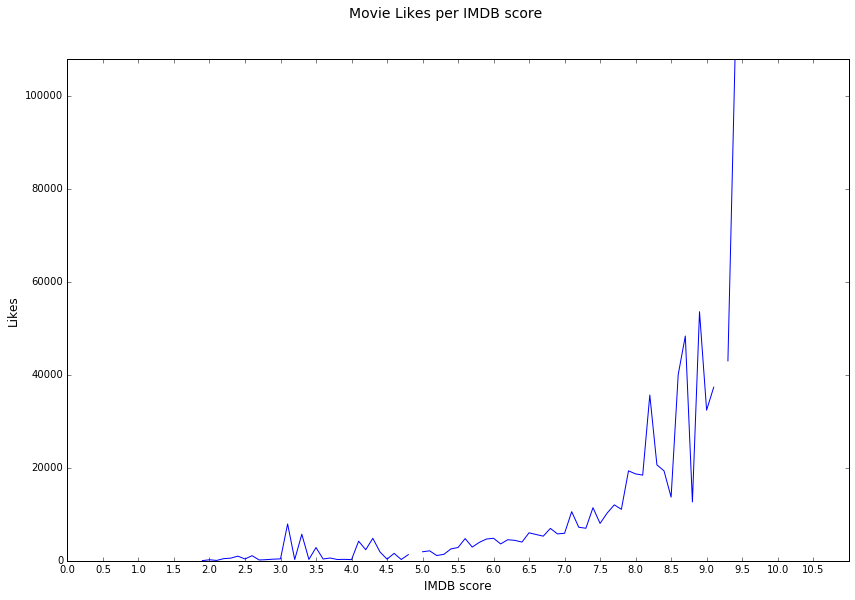

In [39]:
likes = []
x_axis = []
y_axis = []

interval = 1

for i in range (1, 101):
    var1 = dataset.loc[(dataset['imdb_score'] > (interval - 0.1)) & 
        (dataset['imdb_score'] <= interval)][['movie_facebook_likes']].mean().reset_index(
        name='average')[['average']].values
    
    #als de likes 0 zijn gaan we ervan uit dat de film niet op facebook staat
    if (math.isnan(var1)) | (var1 == 0):
        var1 = None
        
    y_axis.append(var1)
    x_axis.append(interval)
    
    interval += 0.1

m = (max(y_axis))

fig = plt.figure(figsize=(14,9))
fig.suptitle('Movie Likes per IMDB score', fontsize = 14)

ax = fig.add_subplot(111)
ax.set_xlabel('IMDB score', fontsize=12)
ax.set_ylabel('Likes', fontsize=12)
plt.plot(x_axis, y_axis)
plt.axis([0, 11, 0, m])

plt.xticks(np.arange(0, 11, 0.5))

plt.show()

# Correlatie Avg Director likes - IMDB-score

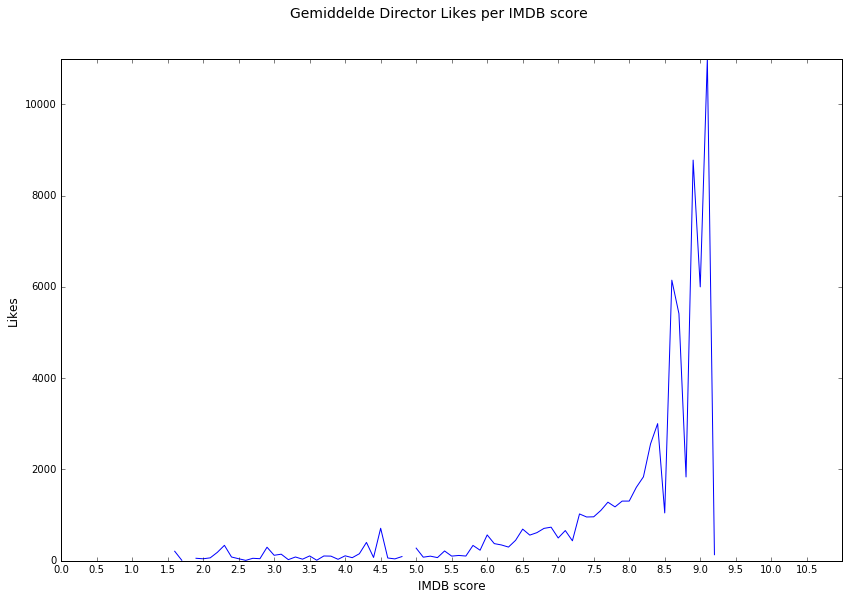

In [40]:
likes = []
x_axis = []
y_axis = []

interval = 1

for i in range (1, 101):
    var1 = dataset.loc[(dataset['imdb_score'] > (interval - 0.1)) & 
        (dataset['imdb_score'] <= interval)][['director_facebook_likes']].mean().reset_index(
        name='average')[['average']].values
    
    #als de likes 0 zijn gaan we ervan uit dat de director niet op facebook staat
    if (math.isnan(var1)) | (var1 == 0):
        var1 = None
        
    y_axis.append(var1)
    x_axis.append(interval)
    
    interval += 0.1

m = (max(y_axis))

fig = plt.figure(figsize=(14,9))
fig.suptitle('Gemiddelde Director Likes per IMDB score', fontsize = 14)

ax = fig.add_subplot(111)
ax.set_xlabel('IMDB score', fontsize=12)
ax.set_ylabel('Likes', fontsize=12)
plt.plot(x_axis, y_axis)
plt.axis([0, 11, 0, m])

plt.xticks(np.arange(0, 11, 0.5))

plt.show()

# Correlatie Avg Actors likes - IMDB-score

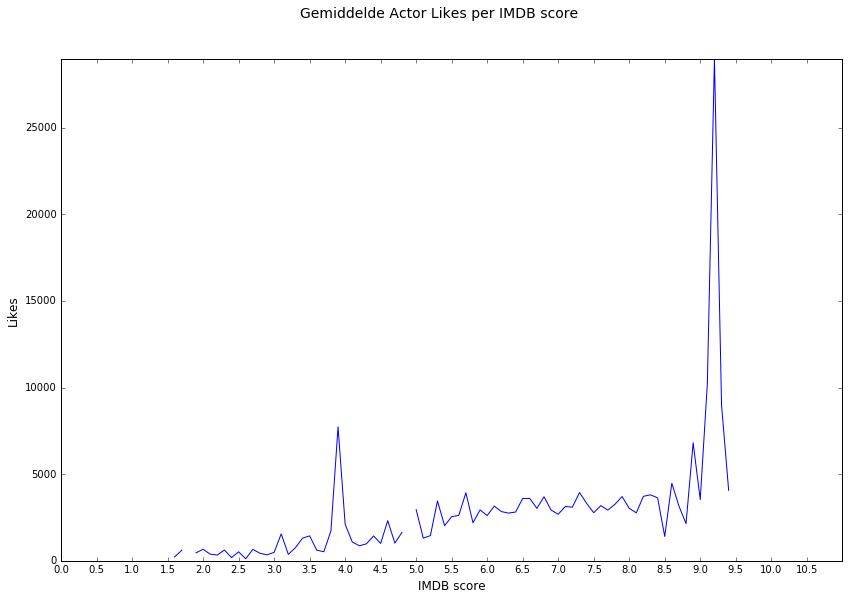

In [41]:
x_axis = []
y_axis = []

interval = 1

for i in range (1, 101):
    var1 = (dataset.loc[(dataset['imdb_score'] > (interval - 0.1)) & 
        (dataset['imdb_score'] <= interval)][['actor_1_facebook_likes']].mean().values +
    dataset.loc[(dataset['imdb_score'] > (interval - 0.1)) & 
        (dataset['imdb_score'] <= interval)][['actor_2_facebook_likes']].mean().values +
    dataset.loc[(dataset['imdb_score'] > (interval - 0.1)) & 
        (dataset['imdb_score'] <= interval)][['actor_3_facebook_likes']].mean().values) / 3
    
    #als de likes 0 zijn gaan we ervan uit dat de acteur(s) niet op facebook staat
    if (math.isnan(var1)) | (var1 == 0):
        var1 = None
        
    y_axis.append(var1)
    x_axis.append(interval)
    
    interval += 0.1

m = (max(y_axis))

fig = plt.figure(figsize=(14,9))
fig.suptitle('Gemiddelde Actor Likes per IMDB score', fontsize = 14)

ax = fig.add_subplot(111)
ax.set_xlabel('IMDB score', fontsize=12)
ax.set_ylabel('Likes', fontsize=12)
plt.plot(x_axis, y_axis)
plt.axis([0, 11, 0, m])

plt.xticks(np.arange(0, 11, 0.5))

plt.show()

# Likes - IMDB score

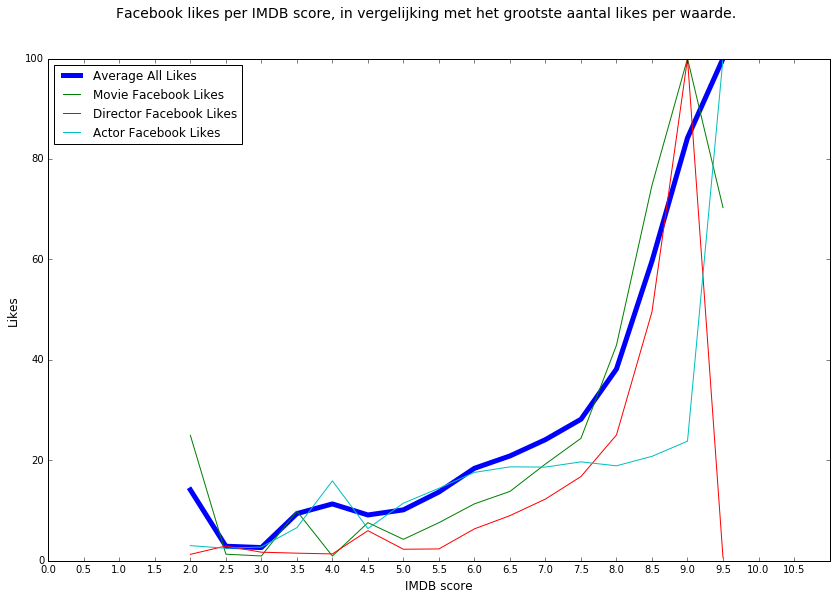

In [42]:
x_axis = []
actorLikes = []
directorLikes = []
movieLikes = []
average = []

ranges = 0.5
interval = 0

def checkNumber(var1):
    if (math.isnan(var1)) | (var1 == 0):
        return None
    return var1

def toPercent(array):
    maxValue = max(array)
    returnArray = []
    for i in range(0, len(array)):
        if array[i] is not None:
            returnArray.append(array[i] / maxValue * 100)
        else:
            returnArray.append(None)
    return returnArray

def checkNan(number):
    if math.isnan(number):
        return 0
    return number

for i in range (1, 51):
    actor = (dataset.loc[(dataset['imdb_score'] > (interval - ranges)) & 
        (dataset['imdb_score'] <= interval)][['actor_1_facebook_likes']].mean().values +
    dataset.loc[(dataset['imdb_score'] > (interval - ranges)) & 
        (dataset['imdb_score'] <= interval)][['actor_2_facebook_likes']].mean().values +
    dataset.loc[(dataset['imdb_score'] > (interval - ranges)) & 
        (dataset['imdb_score'] <= interval)][['actor_3_facebook_likes']].mean().values) / 3
        
    actorLikes.append(checkNumber(actor))
    
    director = dataset.loc[(dataset['imdb_score'] > (interval - ranges)) & 
        (dataset['imdb_score'] <= interval)][['director_facebook_likes']].mean().reset_index(
        name='average')[['average']].values
    
    directorLikes.append(checkNumber(director))
    
    movie = dataset.loc[(dataset['imdb_score'] > (interval - ranges)) & 
        (dataset['imdb_score'] <= interval)][['movie_facebook_likes']].mean().reset_index(
        name='average')[['average']].values
    
    movieLikes.append(checkNumber(movie))
    
    var = checkNan(actor) + checkNan(director) + checkNan(movie) / 3
    if var != 0:
        average.append(var)
    else:
        average.append(None)
    
    x_axis.append(interval)
    
    interval += ranges

actorLikes = toPercent(actorLikes)
directorLikes = toPercent(directorLikes)
movieLikes = toPercent(movieLikes)
average = toPercent(average)

fig = plt.figure(figsize=(14,9))
fig.suptitle('Facebook likes per IMDB score, in vergelijking met het grootste aantal likes per waarde.', fontsize = 14)

ax = fig.add_subplot(111)
ax.set_xlabel('IMDB score', fontsize=12)
ax.set_ylabel('Likes', fontsize=12)

plt.plot(x_axis, average, lw=5)
plt.plot(x_axis, movieLikes)
plt.plot(x_axis, directorLikes)
plt.plot(x_axis, actorLikes)

plt.axis([0, 11, 0, 100])
plt.legend(['Average All Likes', 'Movie Facebook Likes', 'Director Facebook Likes', 'Actor Facebook Likes'], loc='upper left')

plt.xticks(np.arange(0, 11, 0.5))

plt.show()

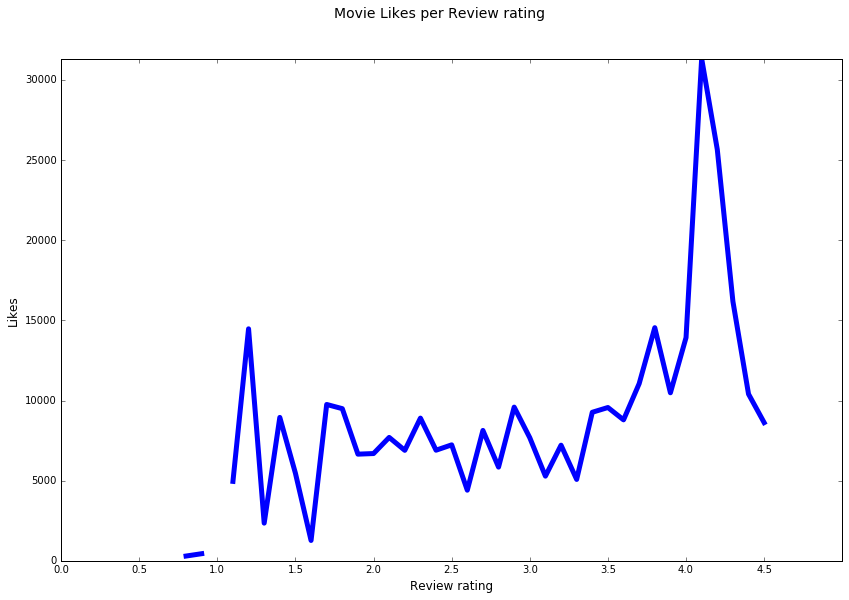

In [43]:
data = movieLensData[['rating', 'movie_title', 'movie_facebook_likes']].groupby('movie_title').mean()
#print data

likes = []
x_axis = []
y_axis = []

interval = 0

for i in range (1, 101):
    var1 = data.loc[(data['rating'] > (interval - 0.1)) & 
        (data['rating'] <= interval)][['movie_facebook_likes']].mean().reset_index(
        name='average')[['average']].values
    
    #als de likes 0 zijn gaan we ervan uit dat de film niet op facebook staat
    if (math.isnan(var1)) | (var1 == 0):
        var1 = None
        
    y_axis.append(var1)
    x_axis.append(interval)
    
    interval += 0.1

m = (max(y_axis))

fig = plt.figure(figsize=(14,9))
fig.suptitle('Movie Likes per Review rating', fontsize = 14)

ax = fig.add_subplot(111)
ax.set_xlabel('Review rating', fontsize=12)
ax.set_ylabel('Likes', fontsize=12)
plt.plot(x_axis, y_axis, lw=5)
plt.axis([0, 5, 0, m])

plt.xticks(np.arange(0, 5, 0.5))

plt.show()